## Computing VaR and CVaR from Historical Scenarios

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

Specify quantile level for VaR/CVaR

In [2]:
alf = 0.99

Read Profit/Loss (P/L) data

In [3]:
xlsfile = pd.ExcelFile('Hist_prices_Citigroup.xls')
PLData = xlsfile.parse('VaR').iloc[1:,3].to_numpy().real

Number of historical scenarios

In [4]:
N = len(PLData)
N

1007

Sort loss data in increasing order

In [5]:
loss_1d = np.sort(-PLData)

Compute Historical 1-day VaR from the data

In [6]:
VaR = loss_1d[int(math.ceil(N * alf)) - 1]

Compute Historical 1-day CVaR from the data

In [7]:
CVaR = (1 / (N * (1 - alf))) * ((math.ceil(N * alf) - N * alf) * VaR + sum(loss_1d[int(math.ceil(N * alf)):]))

Compute Normal 1-day VaR from the data

In [8]:
VaRn = np.mean(loss_1d) + scs.norm.ppf(alf) * np.std(loss_1d)

Compute Normal 1-day CVaR from the data

In [9]:
CVaRn = np.mean(loss_1d) + (scs.norm.pdf(scs.norm.ppf(alf)) / (1 - alf)) * np.std(loss_1d)

In [10]:
print ('Historical 1-day VaR %4.1f%% = $%6.2f, Historical 1-day CVaR %4.1f%% = $%6.2f' % (100 * alf, VaR, 100 * alf, CVaR))
print ('    Normal 1-day VaR %4.1f%% = $%6.2f,     Normal 1-day CVaR %4.1f%% = $%6.2f\n' % (100 * alf, VaRn, 100 * alf, CVaRn))

Historical 1-day VaR 99.0% = $  2.08, Historical 1-day CVaR 99.0% = $  2.64
    Normal 1-day VaR 99.0% = $  1.67,     Normal 1-day CVaR 99.0% = $  1.90



Plot a histogram of the distribution of losses in portfolio value

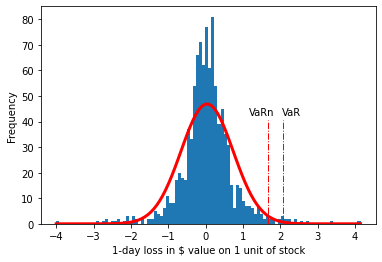

In [11]:
frequencyCounts, binLocations, patches = plt.hist(loss_1d, 100)
normf = (1 / (np.std(loss_1d) * math.sqrt(2 * math.pi))) * np.exp(-0.5 * ((binLocations - np.mean(loss_1d)) / np.std(loss_1d)) ** 2)
normf = normf * sum(frequencyCounts) / sum(normf)
plt.plot(binLocations, normf, color='r', linewidth=3.0)
plt.plot([VaRn, VaRn], [0, max(frequencyCounts) / 2], color='r', linewidth=1, linestyle='-.')
plt.plot([VaR, VaR], [0, max(frequencyCounts)/2], color='r', linewidth=1, linestyle='-.')
plt.text(0.98 * VaR, max(frequencyCounts) / 1.9, 'VaR')
plt.text(0.7 * VaRn, max(frequencyCounts) / 1.9, 'VaRn')
plt.xlabel('1-day loss in $ value on 1 unit of stock')
plt.ylabel('Frequency')
plt.draw()

In [12]:
#plt.tight_layout()
plt.savefig('hVaR.png', dpi=300)
plt.savefig('hVaR.pdf')
#plt.close(fig)

<Figure size 432x288 with 0 Axes>